In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal
import scipy
import math
from matplotlib import animation

In [84]:
# Initial conditions for Case 1 and exact solution
dir0 = 0.0  # u(-L,t)= dir0
dir1 = 0.0  # u(L,t)= dir1

# function for setting initial conditions in space
def I(x): # initial u(x,0)
    result = []
    len_x = np.size(x)
    i_x = np.zeros(len_x)
    for x_i in x:
        i_x = norm.pdf(x_i, 0, 1/(2**2))
        result.append(i_x)
    return result


#Note - I'm assuming D=1
def U_exact(x,t):
    M = np.size(x)
    u_ex = np.zeros(M)
    if t == 0:
        u_ex = norm.pdf(x,0,1/(2**2))
    else:
        y = x - v*t
        u_ex = np.exp(-y**2/(4*t))/np.sqrt(4*np.pi*t)
        u_ex[0] = dir0
        u_ex[M-1] = dir1
    return u_ex

In [85]:
# Defining the wind speed function
def wind_speed(shape, scale):
    # using a weibull with parameter k as an example, we can change it when we have data
    return np.random.weibull(shape)*scale

In [86]:
## ====== setting parameters =======
Nt_gaps = 2**10  # number of timesteps
L = 2**5 # final distance
T = 1  # final time 
Nt_points = Nt_gaps + 1
h = T/(Nt_points)  # time step

t = np.linspace(0.,T,Nt_points)  # times at each time step
Nx_spaces = 2**8; # number of spaces in x direction
Nx_points = Nx_spaces + 1 
x_pde = np.linspace(-L, L, Nx_points)    # mesh points in space
dx = x_pde[1] - x_pde[0] 
dt = t[1] - t[0]

# Setting B, C and v for the numerical soultions
C = dt/(dx**2)
v = 10
B = wind_speed(4,5)*dt/(2*dx)
print("Delta x =", dx, "Delta t = ", dt, "C =", C)


##----------intialise lists ------------------------
# Define the numerical solution 
# the first index is space and the second time
U = np.zeros((Nx_points,Nt_points))

# The initial condition
U[:,0]=I(x_pde)
# enforcing the boundary condition
U[-L,:]  = dir0 
U[L,:] = dir1

Delta x = 0.25 Delta t =  0.0009765625 C = 0.015625


In [87]:
x_ex = np.linspace(-L, L, Nx_points)
def plotting(U,L,type):
    size_t = np.size(U,1)-1 # number of time steps
   
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    markers =['X','.','+','o']

    colours = ['r','g','b','purple','yellow'] # make comparison easy
    colours1 = ['b','purple','yellow','r','g',]
    colour_pos = 0;



# some arbitarily chosen time points to compare at
    for plot_pos in [0, int(size_t/10),int(size_t/5), int(size_t/2), int(size_t)]:
        if type == "exact":
            U_tplot = U_exact(x_ex,t[plot_pos])
            label = "Exact, t=" + "%0.3f" % (t[plot_pos],)
            ax.plot(x_ex,U_tplot,linestyle = ':',color = colours[colour_pos],marker = ".",markersize = 1, label=label)
            colour_pos = colour_pos + 1;
    # numerical solution
        else:
            label = "Numerical PDE, t=" + "%0.3f" % (t[plot_pos],)
            ax.plot(x_pde,U[:,plot_pos],color = colours[colour_pos],ls='--', label=label)
            colour_pos = colour_pos + 1;

    plt.xlim(-L,L) # zoom in on area of interest
    ax.legend() # turn on legend 
    plt.show()

(257, 1025)


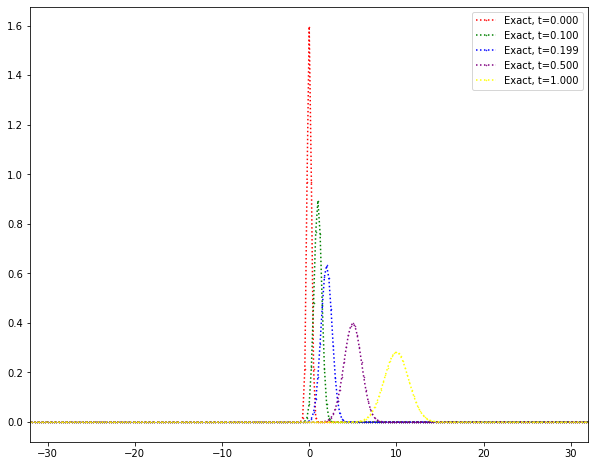

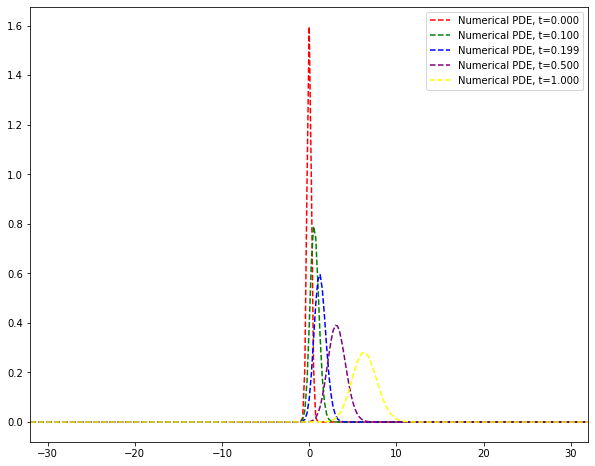

In [88]:
u_old = I(x_pde)

u = np.zeros(Nx_points)
# and to store the full solution
U = np.zeros((Nx_points,Nt_points))
U[:,0] = u_old
for n in range(1, Nt_points):  
    # set Dirichlet boundary points here
    #...
    # compute u at inner mesh points
    for i in range(1, Nx_points-1):
        u[i] = (1-2*C)*u_old[i] + (C+B)*(u_old[i-1]) + (C-B)*(u_old[i+1])
 
    # update u_old before next step
    u_old[:]= u

    # copy into full storage
    U[:,n] = u;
print(U.shape)
plotting(U,L, "exact")
plotting(U,L, "numerical")

In [89]:
#Note - I'm assuming D=1
def U_exact(x,t):
    M = np.size(x)
    u_ex = np.zeros(M)
    for x_i in x:
        if t == 0:
            x_i = norm.pdf(x[i], 0, 1/(2**12))
    else:
        x_i = 1/(2*np.pi*t)*np.exp(-x**2/(4*t))
    return u_ex

# Extending to 2D

In [134]:
# ====== setting parameters =======
Nt_gaps = 2**5  # number of timesteps
Lx = 10  # final distance in x
Ly = 10  # final distance in y
T = 10  # final time
Nt_points = Nt_gaps + 1
h = T/(Nt_points)  # time step

t = np.linspace(0.,T,Nt_points)  # times at each time step
Nx_spaces = 2; # number of spaces in x direction
Nx_points = Nx_spaces + 1
Ny_points = Nx_points
x_pde = np.linspace(-L, L, Nx_points)    # mesh points in space
dx = x_pde[1] - x_pde[0]
dt = t[1] - t[0]



In [171]:
x_pde = np.linspace(-3, 3, Nx_points)
y_pde = np.linspace(-3, 3, Ny_points)

x1,y1 = np.meshgrid(x_pde, y_pde,sparse = True)
#print((x1,y1))
# Note - how do we justify choice of covariance?
dist = multivariate_normal(mean=[0,0], cov=[[1/(10),0],[0,1/(100)]])

# function for setting initial conditions in 2D space
def I(arr1, arr2): # initial u(x,0):
    lenx= int(len(arr1[0]))
    print(lenx)
    leny = int(np.shape(arr2)[0])
    print(leny)
    result = np.zeros((3,3))
    for x in arr1[0]:
        print(x)
        for y in arr2:
            xy = dist.pdf([x,y[0]])
            #print(x,y,xy, arr[x][y])
            result[x][y[0]] = xy

    return result


U =  np.zeros((Nt_points,Nx_points,Ny_points))
u = np.zeros((Nx_points, Ny_points))
#print(np.shape(grid[0]))
#print(np.shape(U[0,:]))
I(x1,y1)

3
3
-3.0


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [95]:
u_old = I(grid[0])
U[0,:,:] = u_old

# enforcing the boundary condition
U[:,-L,:]  = dir0
U[:,L,:] = dir1

U[:,:,-L]  = dir0
U[:,:,-L] = dir1


for n in range(1, Nt_points):
    # set Dirichlet boundary points here
    #...
    # compute u at inner mesh points
    for i in range(1, Nx_points-1):
        for j in range(1,Nx_points -1):
            u[i][j] = (1-2*C)*u_old[i][j] + (C+B)*(u_old[i-1][j]) + (C-B)*(u_old[i+1][j])


    # update u_old before next step
    u_old[:]= u

    # copy into full storage
    U[n,:,:] = u;


0 0 -32.0
0 1 -30.0
0 2 -28.0
0 3 -26.0
0 4 -24.0
0 5 -22.0
0 6 -20.0
0 7 -18.0
0 8 -16.0
0 9 -14.0
0 10 -12.0
0 11 -10.0
0 12 -8.0
0 13 -6.0
0 14 -4.0
0 15 -2.0
0 16 0.0
0 17 2.0
0 18 4.0
0 19 6.0
0 20 8.0
0 21 10.0
0 22 12.0
0 23 14.0
0 24 16.0
0 25 18.0
0 26 20.0
0 27 22.0
0 28 24.0
0 29 26.0
0 30 28.0
0 31 30.0
0 32 32.0
1 0 -32.0
1 1 -30.0
1 2 -28.0
1 3 -26.0
1 4 -24.0
1 5 -22.0
1 6 -20.0
1 7 -18.0
1 8 -16.0
1 9 -14.0
1 10 -12.0
1 11 -10.0
1 12 -8.0
1 13 -6.0
1 14 -4.0
1 15 -2.0
1 16 0.0
1 17 2.0
1 18 4.0
1 19 6.0
1 20 8.0
1 21 10.0
1 22 12.0
1 23 14.0
1 24 16.0
1 25 18.0
1 26 20.0
1 27 22.0
1 28 24.0
1 29 26.0
1 30 28.0
1 31 30.0
1 32 32.0
2 0 -32.0
2 1 -30.0
2 2 -28.0
2 3 -26.0
2 4 -24.0
2 5 -22.0
2 6 -20.0
2 7 -18.0
2 8 -16.0
2 9 -14.0
2 10 -12.0
2 11 -10.0
2 12 -8.0
2 13 -6.0
2 14 -4.0
2 15 -2.0
2 16 0.0
2 17 2.0
2 18 4.0
2 19 6.0
2 20 8.0
2 21 10.0
2 22 12.0
2 23 14.0
2 24 16.0
2 25 18.0
2 26 20.0
2 27 22.0
2 28 24.0
2 29 26.0
2 30 28.0
2 31 30.0
2 32 32.0
3 0 -32.0
3 1 -30.0

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.43560219e-95
 5.03292121e+00 1.43560219e-95 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


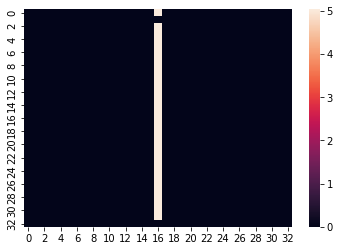

In [96]:
import seaborn as sb
sb.heatmap(U[0])
print(U[0][15])